# Homework 2

## 1) Preprocess Dataset

In [1]:
# import needed libraries
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
import pandas as pd
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv("Breast_cancer_dataset.csv")

In [3]:
# check for missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [5]:
# remove the columns with all missing values (Unnamed: 32)
df = df.dropna(axis=1, how='all')
# remove non-relevant id column
df = df.drop(columns=['id'])
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

In [6]:
df = df.copy()
# preprocess diagnosis binary variable
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

In [7]:
df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

## 2) Data Exploration

<Axes: xlabel='diagnosis', ylabel='count'>

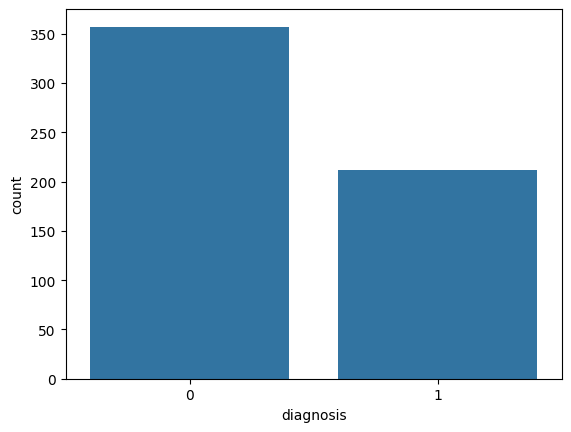

In [8]:
# visualize target variable distribution
sns.countplot(x="diagnosis", data=df)

## 3) Question 1

In [9]:
# return statified k-folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### a)

In [10]:
# separate input from output variables
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [11]:
classifiers = {
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

for name, classifier in classifiers.items():
    accs = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
    accs_mean = round(accs.mean(), 2)
    print(name, "accuracies =", accs)
    print(name, "accuracy =", accs_mean, "±", round(accs.std(), 4))

kNN accuracies = [0.92982456 0.90350877 0.92982456 0.95614035 0.95575221]
kNN accuracy = 0.94 ± 0.0196
Naive Bayes accuracies = [0.96491228 0.90350877 0.92982456 0.92982456 0.96460177]
Naive Bayes accuracy = 0.94 ± 0.0235


Even through the standard deviations (σ) for both models are extremely close, we can conclude that kNN is more stable, since σ(NB) = 0.0235 > 0.0196 = σ(kNN). This indicates the accuracy values are less dispersed for different folds, which in turn demonstrates greater stability of the model. Nonetheless, both models are very stable, since their standard deviations are small.

### b)

In [12]:
knn_model = make_pipeline(MinMaxScaler(), classifiers['kNN'])

# Evaluate knn accuracy using cross-validation
knn_scores = cross_val_score(knn_model, X, y, cv=cv, scoring='accuracy')

print("Accuracy per fold:", knn_scores)
print(f"Mean accuracy: {knn_scores.mean():.4f} ± {knn_scores.std():.4f}")

Accuracy per fold: [0.98245614 0.95614035 0.92982456 0.98245614 0.96460177]
Mean accuracy: 0.9631 ± 0.0195


Why Min-Max scaling is important:

kNN is a distance-based algorithm that finds the nearest neighbors to the point we want to classify. Without scaling, features with larger numeric ranges will have a greater influence on the distance calculation, and therefore classification.

For example, for 1) Feature A: range [0, 1] and 2) Feature B: range [0, 100000], Feature B will have a much greater impact on the distance.

By applying Min-Max scaling, we rescale each feature to a smaller range, for example, [0, 1]. This ensures that all features contribute equally to the distance and that its calculation is not determined solely by a small set of features. It also ensures that a feature's impact on the classification is based on its true importance, not its range.

Without scaling, lower accuracies are achieved because the algorithm is giving more importance to features with the largest range, which doesn't reflect their true importance. With scaling, accuracies will be higher and more stable.

### c) 

Let's calculate the p-value for the hypothesis H0 = k𝑁𝑁 model is statistically superior to Naïve Bayes vs. H1 = k𝑁𝑁 model is not statistically superior to Naïve Bayes, assuming a significance level of 0.05.

In [13]:
nb_model  = make_pipeline(MinMaxScaler(), classifiers['Naive Bayes'])

# Evaluate Naive Bayes accuracy using cross-validation
nb_scores = cross_val_score(knn_model, X, y, cv=cv, scoring='accuracy')

print("Naive Bayes accuracies:", nb_scores)

Naive Bayes accuracies: [0.98245614 0.95614035 0.92982456 0.98245614 0.96460177]


In [14]:
# Perform paired t-test
t_stat, p_value = ttest_ind(knn_scores, nb_scores, alternative='greater')

print(f"\n t-test results: p-value = {p_value}")


 t-test results: p-value = 0.5


In [15]:
alpha = 0.05

if p_value > alpha:
    print("H0 rejected: kNN model is not statistically superior to Naïve Bayes since p-value is greater than the significance level")
else:
    print("H0 accepted: kNN model is statistically superior to Naïve Bayes since p-value is smaller or equal to the significance level")

H0 rejected: kNN model is not statistically superior to Naïve Bayes since p-value is greater than the significance level


## 4) Question 2

### a)

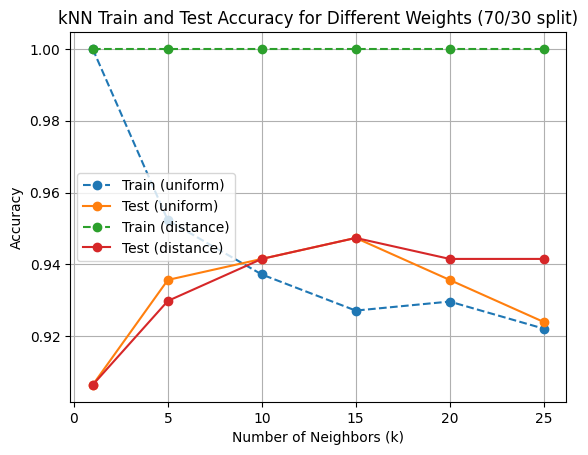

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=50)

k_values = [1, 5, 10, 15, 20, 25]

for weights in ['uniform', 'distance']:
    train_accuracies = []
    test_accuracies = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weights)
        knn.fit(X_train, y_train)

        train_accuracies.append(knn.score(X_train, y_train))
        test_accuracies.append(knn.score(X_test, y_test))

    plt.plot(k_values, train_accuracies, marker='o', linestyle='--', label=f"Train ({weights})")
    plt.plot(k_values, test_accuracies, marker='o', linestyle='-', label=f"Test ({weights})")

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("kNN Train and Test Accuracy for Different Weights (70/30 split)")
plt.grid(True)
plt.legend()
plt.show()

### b)

Analyzing the plot we obtained from a), we can see that as the number of neighbors (k) increases in the kNN model, the accuracy tends to decrease. This happens because a larger k value means that the model considers more neighbors when making predictions, which can lead to over-smoothing (the model makes predictions based on more neighbours, becoming more sensitive to noise).

Uniform weights:

With small k values (k < 15), the model captures local patterns in the training data, leading to higher training accuracy and very low testing accuracy for uniform weights (overfitting). However, as k increases beyond this point (larger values), the model starts to include more distant neighbors that may not be as relevant, generalizing more and resulting in a drop in training accuracy, as we can see in the plot.
The test accuracy starts small and increases until k = 15, after which it decreases slightly. This shows that k = 15 is the best value for the bias–variance tradeoff, as variance has dropped (less sensitive to noise) and bias is still low enough to capture the pattern.

Distance weights:

Here, how much each neighbour contributes to the classification, depends on its distance to the target. Therefore, train accuracy remains at 1 across all k, since closer neighbours dominate and the model overfits. Test accuracy peaks around k = 15 and shows a similar behaviour to uniform weights.

In summary, the choice of k in kNN is a trade-off between bias and variance. Smaller k values can lead to low bias and high variance (overfitting), while larger k values can lead to high bias and low variance (underfitting). The optimal value of k is typically found through cross-validation, balancing these trade-offs to achieve the best generalization performance on unseen data. So, an optimal k value would be k = 15, where the model achieves the highest accuracy without over-smoothing.

## 5) Question 3

#### 1) Interpretability and Clinical Trust

Interpreting results and how much each feature influences the predictions, as well as presenting patients justified and transparent medical decisions are crucial in a clinical context. Let's analyse how kNN and Naïve Bayes influence these factors.

Naïve Bayes provides a probabilistic model, based on the likelihoods of each class. These probabilities offer a strong interpretation point for clinicians to see which features influence the result more. This allows them to justify medical decisions accordingly and show patients calibrated risk estimates.

Predictions made with kNN are based on proximity to neighbouring or similar cases. Therefore, it doesn't offer a global, well-fitted model since it depends on the distance metric and feature scaling on the training data. It does not do well at extrapolating to general cases it has never seen before, or explaining why a certain classification was made. It simply looks at similar prior patients and draws conclusions. Moreover, kNN is very sensitive to outliers and scaling, as it is distance based.

#### 2) Computational Cost and Scalability

Clinical systems often need to handle large patient databases and provide real-time predictions, which makes computational efficiency another key factor.

Naïve Bayes, once trained, is very fast at predicting. The algorithm just has to calculate and compare the posterior probabilities of each class, based on pre-computed feature likelihoods and mean/variance per class. This means it only has to perform constant time operations for each feature and therefore the computation time only depends on the number of features in the dataset asymptotically. For that reason, it runs predictions in O(f) time (f number of features). Moreover, it only needs to store means and variaces in memory. In conclusion, this model is very fast in providing real-time predictions, and easily scalable.

kNN is much more computationally expensive, since it needs to calculate the distance between a single test sample and all training sammples for each feature in order to make a prediction. This becomes strongly penalized as the dataset grows, as it runs in O(N×f) time (f number of features, N number of samples in training dataset). It also needs to maintain the training set in memory. This could become problematic for providing fast real-time predictions, environments where resources and harware are constarined, or even as the dataset grows.

#### 3) Metrics in a Clinical Context

In clinical contexts, sensitivity/recall (prioritize finding positives) is often more important than accuracy (prioritize making a correct prediction, whether it is positive or negative), because missing a disease case is much worse than a false alarm.

Naïve Bayes computes posterior probabilities using Bayes’ theorem, assuming feature independence. This makes it easier to tune the decision threshold on the posterior probability to prioritize sensitivity.

kNN classifies based on the classifications of the k nearest neighbours. This means that the predictions depend heavily on data distribution and the choice of the parameter K, making it more susceptible to noise influence or imbalances between classes. If the positive case is rare, as it often happens in clinical datasets, negative cases will be the dominating factor when making predictions, lowering recall.

#### 4) What our experiments showed

In our homework, cross-validated accuracies were very close:

- kNN accuracies per fold = [0.92982456 0.90350877 0.92982456 0.95614035 0.95575221]
- Naïve Bayes accuracies per fold = [0.96491228 0.90350877 0.92982456 0.92982456 0.96460177]

- kNN mean accuracy = 0.94 ± 0.0196
- Naïve Bayes mean accuracy = 0.94 ± 0.0235

Moreover, we performed a t-test which resulted in a p-value = 0.5, which shows there is no statistically relevant difference in accuracies for each model. This means that measures of the accuracy metric in our homework are not a factor that should drive the choice between models.

#### 5) Conclusion

Given these results and the provided analysis, we would choose the Naïve Bayes over kNN to make predictions in a clinical context, since it provides a fast, computationally efficient, probabilistic model that facilitates interpretation by clinicians, full transparency on predictions and risk, as well as prioritizing important performance metrics such as recall. kNN could be used when case-based justification is valued and operational constraints are manageable.